In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [2]:
data = pd.read_csv('../data/application_data.csv', index_col='SK_ID_CURR')
data = data[data.columns[:40]]

In [3]:
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1,MONDAY,11,0,0,0,0,0,0,School
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,2,MONDAY,9,0,0,0,0,0,0,Government
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [4]:
data.shape

(307511, 40)

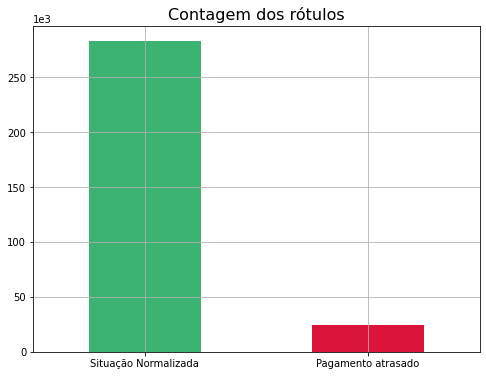

In [5]:
data['TARGET'].map({0:'Situação Normalizada', 1:'Pagamento atrasado'}).value_counts().plot.bar(rot=0, figsize=(8, 6), color=['mediumseagreen', 'crimson'])
plt.ticklabel_format(axis='y', style='sci', scilimits=(3, 3))
plt.title('Contagem dos rótulos', fontsize=16)
plt.grid()

In [6]:
categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
                       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
                       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']

time_columns = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

numerical_columns = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'CNT_CHILDREN',
                     'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
                     'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'REGION_POPULATION_RELATIVE',
                     'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

In [10]:
missing_values_columns = data.count()[data.count() < data.shape[0]].index.to_list()
data.count()[data.count() < data.shape[0]]

OCCUPATION_TYPE    210201
dtype: int64

In [8]:
data = data[(pd.notnull(data['AMT_ANNUITY'])) & (pd.notnull(data['AMT_GOODS_PRICE'])) & 
            (pd.notnull(data['NAME_TYPE_SUITE'])) & (pd.notnull(data['CNT_FAM_MEMBERS']))]

data.loc[pd.isnull(data['OWN_CAR_AGE']), 'OWN_CAR_AGE'] = 0



In [16]:
data.loc[pd.isnull(data['OCCUPATION_TYPE'])][['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']].head(20)

,OCCUPATION_TYPE,ORGANIZATION_TYPE
SK_ID_CURR,,
100011,NaN,XNA
100015,NaN,XNA
100027,NaN,XNA
100033,NaN,Military
100035,NaN,Business Entity Type 3
100045,NaN,XNA
100050,NaN,XNA
100051,NaN,Business Entity Type 3
100053,NaN,XNA


In [19]:
data['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [11]:
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1,MONDAY,11,0,0,0,0,0,0,School
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,2,MONDAY,9,0,0,0,0,0,0,Government
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,2,THURSDAY,11,0,0,0,0,1,1,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,1,THURSDAY,15,0,0,0,0,0,0,Services
456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,2,MONDAY,8,0,0,0,0,0,0,XNA
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,3,THURSDAY,9,0,0,0,0,1,1,School


In [69]:
for column in categorical_columns:
    
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [70]:
data[column]

SK_ID_CURR
100002    Unaccompanied
100003           Family
100004    Unaccompanied
100006    Unaccompanied
100007    Unaccompanied
              ...      
456251    Unaccompanied
456252    Unaccompanied
456253    Unaccompanied
456254    Unaccompanied
456255    Unaccompanied
Name: NAME_TYPE_SUITE, Length: 307511, dtype: object

0    282686
1     24825
Name: TARGET, dtype: int64